In [127]:
import numpy as np
from scipy.optimize import minimize
from sympy import *
init_printing(use_latex=true)

In [137]:
n, T, i, t, lda, eps = symbols('n T i t \lambda \epsilon')       # n wells & T timepoints
n = 3
T = 5

In [78]:
c = MatrixSymbol('c', n, T)      # Row 0 = well 0   , Column 3 = Timepoint 3
pprint(c.as_explicit())

⎡c₀₀  c₀₁  c₀₂  c₀₃  c₀₄⎤
⎢                       ⎥
⎢c₁₀  c₁₁  c₁₂  c₁₃  c₁₄⎥
⎢                       ⎥
⎣c₂₀  c₂₁  c₂₂  c₂₃  c₂₄⎦


In [60]:
d = MatrixSymbol('d', n, T)   
pprint(d.as_explicit())

⎡d₀₀  d₀₁  d₀₂  d₀₃  d₀₄⎤
⎢                       ⎥
⎢d₁₀  d₁₁  d₁₂  d₁₃  d₁₄⎥
⎢                       ⎥
⎣d₂₀  d₂₁  d₂₂  d₂₃  d₂₄⎦


In [61]:
p = MatrixSymbol('p', n, T)  
pprint(p.as_explicit())

⎡p₀₀  p₀₁  p₀₂  p₀₃  p₀₄⎤
⎢                       ⎥
⎢p₁₀  p₁₁  p₁₂  p₁₃  p₁₄⎥
⎢                       ⎥
⎣p₂₀  p₂₁  p₂₂  p₂₃  p₂₄⎦


In [62]:
w = MatrixSymbol('w', n, 1)
pprint(w.as_explicit())

⎡w₀₀⎤
⎢   ⎥
⎢w₁₀⎥
⎢   ⎥
⎣w₂₀⎦


In [63]:
P = MatrixSymbol('P', 1, T)
pprint(P.as_explicit())


[P₀₀  P₀₁  P₀₂  P₀₃  P₀₄]


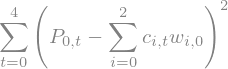

In [108]:
S1 = Sum((P[0,t] - Sum(c[i, t]*w[i,0], (i, 0, n-1)))**2 , (t, 0, T-1))
S1

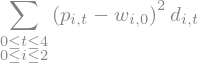

In [109]:
S2 = Sum(Sum(d[i,t]*((p[i,t]-w[i, 0]))**2 , (t, 0, T-1)), (i, 0, n-1))
S2

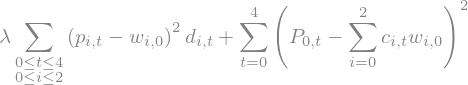

In [110]:
I = S1 + lda*S2
I

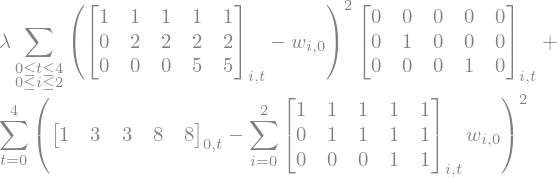

In [111]:
I2 = I.subs({P: Matrix([[1, 3, 3, 8, 8]]), c: Matrix([[1, 1, 1, 1, 1], [0, 1, 1, 1, 1], [0, 0, 0, 1, 1]])})
I3 = I2.subs({d: Matrix([[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0]])})
Inaccuracy = I3.subs({p: Matrix([[1, 1, 1, 1, 1],  [0, 2, 2, 2, 2], [0, 0, 0, 5, 5]])})
Inaccuracy

In [138]:
# Testing with true result
wEval = Matrix([1, 2, 5])
regHP = 0.2

solve(Inaccuracy.subs({w: wEval, lda: regHP})-eps, eps)

In [170]:
def inac(wTest, *args):
    regHP = args[0]
    Inaccuracy = args[1]
    wEval = Matrix(wTest)
    val = solve(Inaccuracy.subs({w: wEval, lda: regHP})-eps, eps)[0]
    return(val)

In [171]:
w0 = [1, 2, 3]
regHP = 2
args = (regHP, Inaccuracy)
minimize(inac, w0, args=args, method='Nelder-Mead', tol=10**-2, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000053
         Iterations: 39
         Function evaluations: 74


 final_simplex: (array([[0.99674421, 2.00435818, 4.99917768],
       [1.00288809, 1.99594291, 4.99913378],
       [0.9998392 , 2.00399521, 4.99583915],
       [0.99720984, 2.00046218, 4.9942734 ]]), array([5.25275681e-05, 5.37790632e-05, 9.61930878e-05, 2.14391922e-04]))
           fun: 5.2527568146113435e-05
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 39
        status: 0
       success: True
             x: array([0.99674421, 2.00435818, 4.99917768])

In [160]:
inac([1, 2, 3], 0.5, Inaccuracy)